## Analysis

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import combinations, product
import scipy.stats as stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df = pd.read_csv('./data/cleaned_data.csv')
df

,Sub-Area,Type,Area,Price,Company,Township,Township Area,ClubHouse,School,Hospital,Mall,Park,Pool,Gym
0,bavdhan,1.0,492,3.900,shapoorji paloonji,Vanaha,1000.0,1,1,1,1,1,1,1
1,bavdhan,2.0,774,6.500,shapoorji paloonji,Vanaha,1000.0,1,1,1,1,1,1,1
2,bavdhan,3.0,889,7.400,shapoorji paloonji,Vanaha,1000.0,1,1,1,1,1,1,1
3,bavdhan,3.0,1018,8.900,shapoorji paloonji,Vanaha,1000.0,1,1,1,1,1,1,1
4,mahalunge,2.0,743,7.400,godrej properties,Godrej Hills retreat,100.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,baner,3.0,2000,16.000,supreme,SUPREME ESTIA,5.0,1,0,0,0,1,1,1
189,baner,4.0,1600,23.000,supreme,SUPREME ESTIA,5.0,1,0,0,0,1,1,1
190,baner,2.0,1173,9.500,tejraaj group,TEJ ELEVIA,2.5,0,0,0,0,1,1,1
191,baner,3.0,1657,13.500,tejraaj group,TEJ ELEVIA,2.5,0,0,0,0,1,1,1


### Univariate Analysis

#### Numerical Features

<Axes: xlabel='Area', ylabel='Price'>

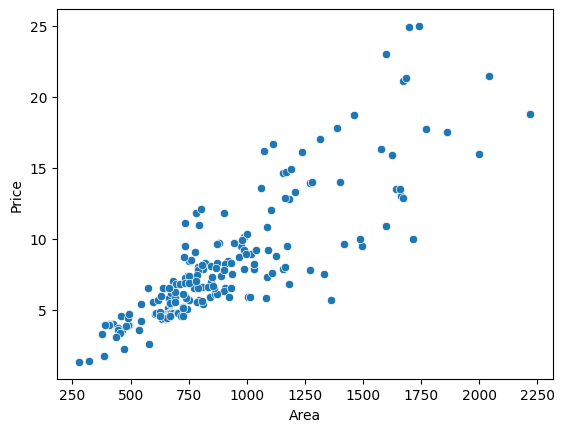

In [3]:
sns.scatterplot(df, x='Area', y='Price')

<Axes: xlabel='Township Area', ylabel='Price'>

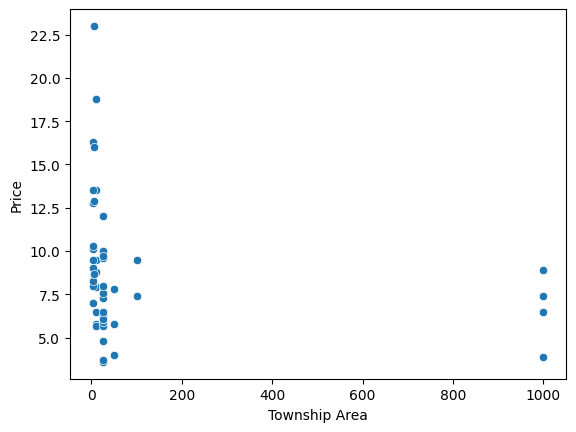

In [4]:
sns.scatterplot(df, x='Township Area', y='Price')

There seems to be no relation between 'Township Area' and 'Price'. So removing 'Township Area'

In [5]:
df.drop(columns=['Township Area'], axis=1, inplace=True)

#### Categorical Features

<Axes: xlabel='Sub-Area', ylabel='Price'>

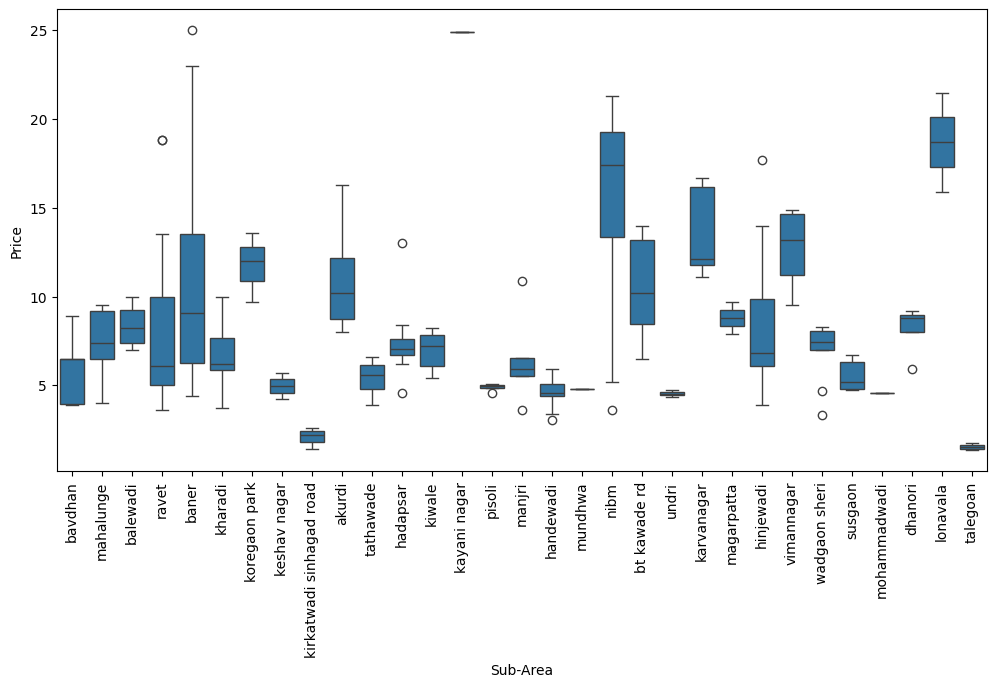

In [6]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.boxplot(df, x='Sub-Area', y='Price')

<Axes: xlabel='Sub-Area', ylabel='Price'>

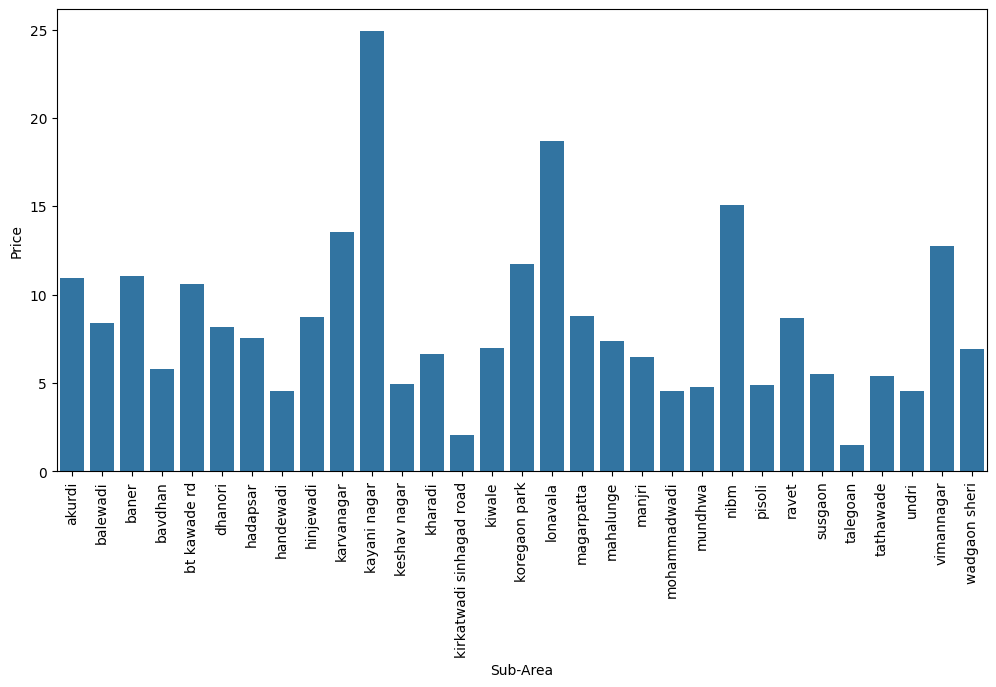

In [7]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(df.groupby('Sub-Area')['Price'].mean())

<Axes: xlabel='Type', ylabel='Price'>

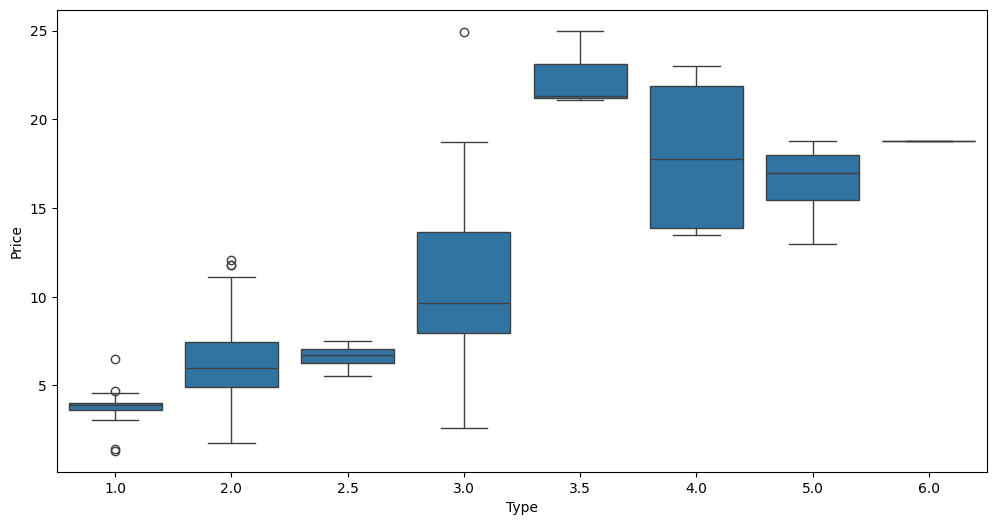

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(df, x='Type', y='Price')

<Axes: xlabel='Company', ylabel='Price'>

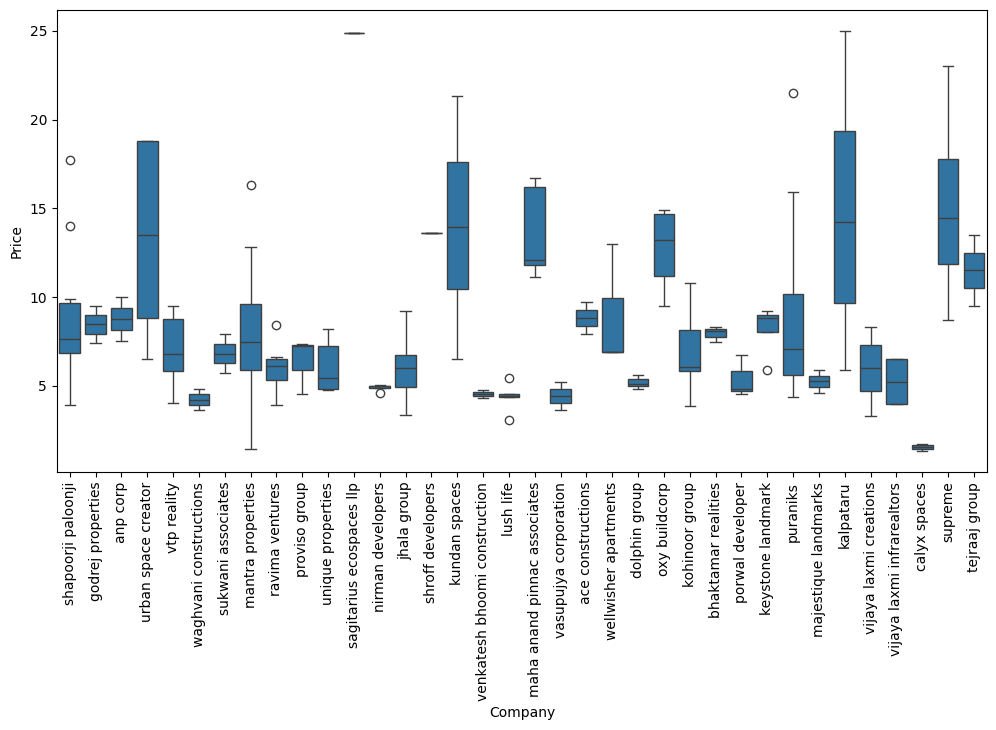

In [9]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.boxplot(df, x='Company', y='Price')

<Axes: xlabel='Company', ylabel='Price'>

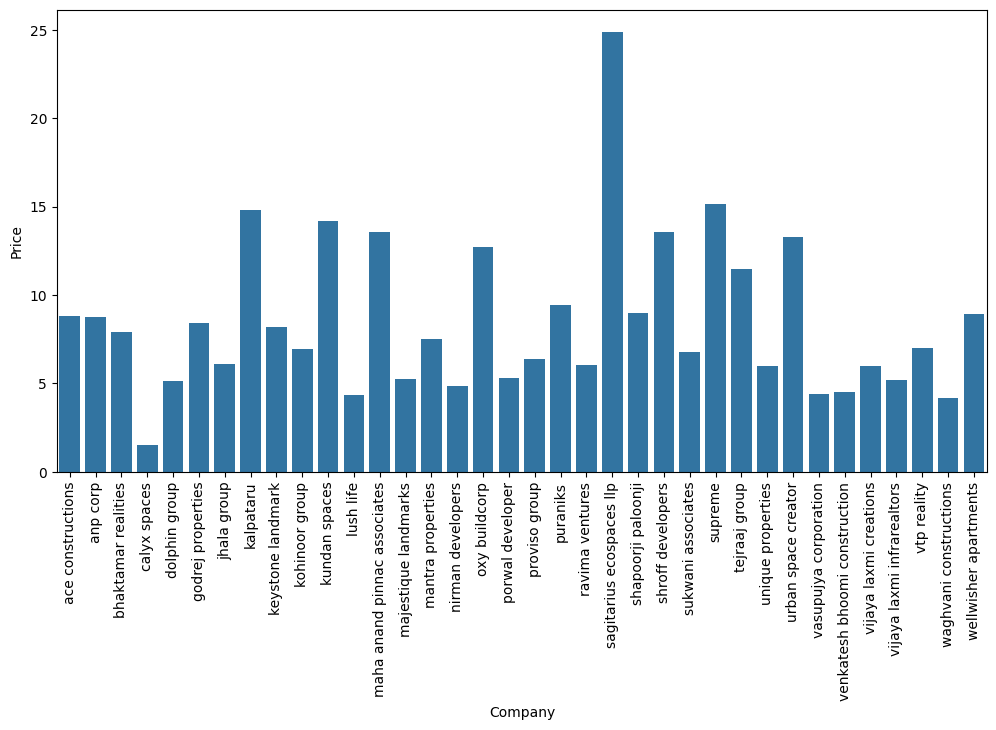

In [10]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(df.groupby('Company')['Price'].mean())

<Axes: xlabel='Township', ylabel='Price'>

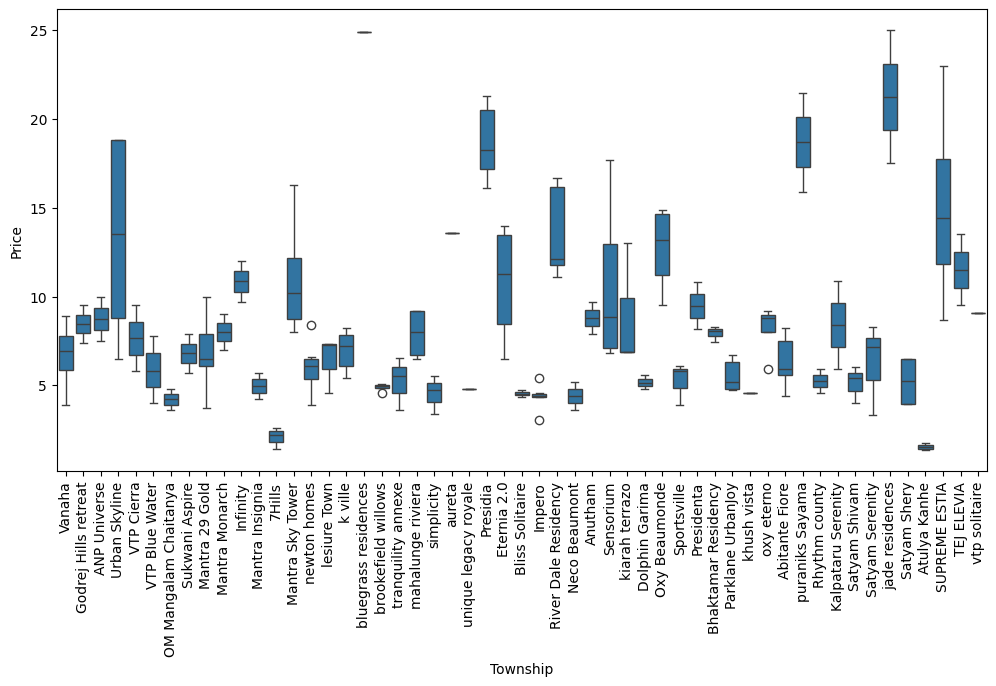

In [11]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.boxplot(df, x='Township', y='Price')

<Axes: xlabel='Township', ylabel='Price'>

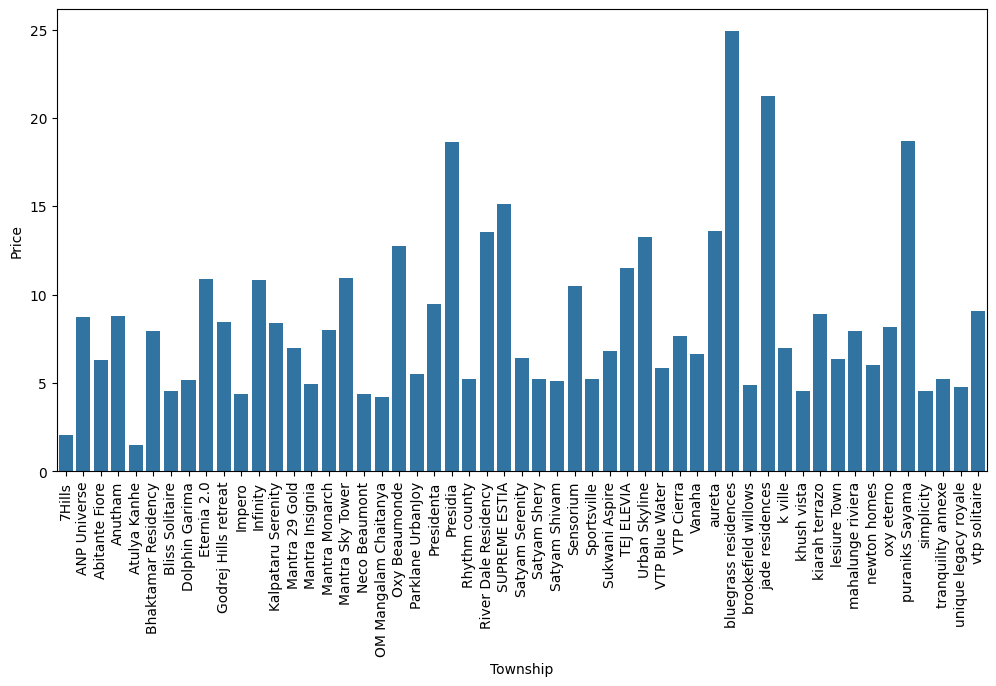

In [12]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(df.groupby('Township')['Price'].mean())

Text(0, 0.5, 'Price')

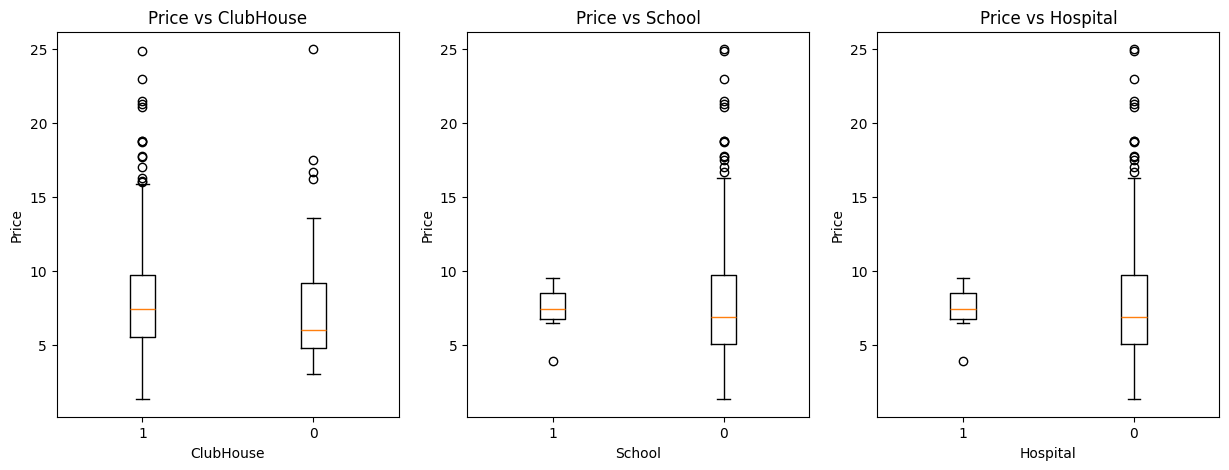

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Creating boxplot for 'ClubHouse' vs 'Price'
ax[0].boxplot([df[df['ClubHouse'] == value]['Price'] for value in df['ClubHouse'].unique()])
ax[0].set_title('Price vs ClubHouse')
ax[0].set_xticklabels(df['ClubHouse'].unique())
ax[0].set_xlabel('ClubHouse')
ax[0].set_ylabel('Price')

# Creating boxplot for 'School' vs 'Price'
ax[1].boxplot([df[df['School'] == value]['Price'] for value in df['School'].unique()])
ax[1].set_title('Price vs School')
ax[1].set_xticklabels(df['School'].unique())
ax[1].set_xlabel('School')
ax[1].set_ylabel('Price')

# Creating boxplot for 'ClubHouse' vs 'Price'
ax[2].boxplot([df[df['Hospital'] == value]['Price'] for value in df['Hospital'].unique()])
ax[2].set_title('Price vs Hospital')
ax[2].set_xticklabels(df['Hospital'].unique())
ax[2].set_xlabel('Hospital')
ax[2].set_ylabel('Price')

Text(0, 0.5, 'Price')

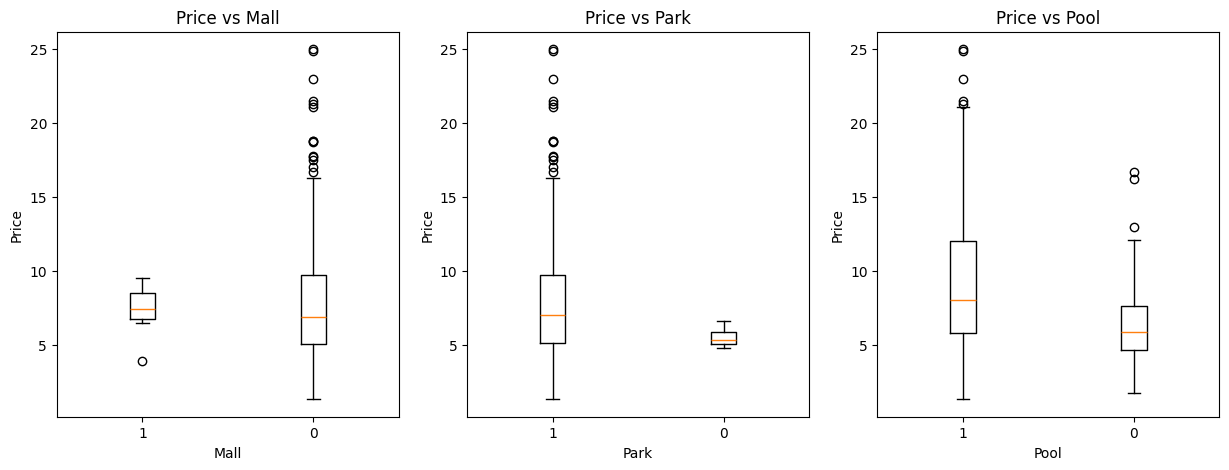

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Creating boxplot for 'School' vs 'Price'
ax[0].boxplot([df[df['Mall'] == value]['Price'] for value in df['Mall'].unique()])
ax[0].set_title('Price vs Mall')
ax[0].set_xticklabels(df['Mall'].unique())
ax[0].set_xlabel('Mall')
ax[0].set_ylabel('Price')

# Creating boxplot for 'ClubHouse' vs 'Price'
ax[1].boxplot([df[df['Park'] == value]['Price'] for value in df['Park'].unique()])
ax[1].set_title('Price vs Park')
ax[1].set_xticklabels(df['Park'].unique())
ax[1].set_xlabel('Park')
ax[1].set_ylabel('Price')

# Creating boxplot for 'School' vs 'Price'
ax[2].boxplot([df[df['Pool'] == value]['Price'] for value in df['Pool'].unique()])
ax[2].set_title('Price vs Pool')
ax[2].set_xticklabels(df['Pool'].unique())
ax[2].set_xlabel('Pool')
ax[2].set_ylabel('Price')

Text(0, 0.5, 'Price')

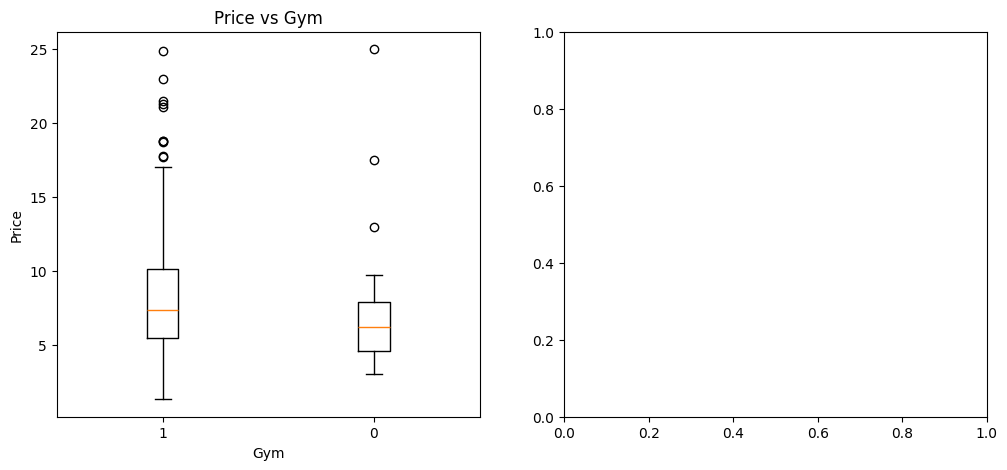

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Creating boxplot for 'ClubHouse' vs 'Price'
ax[0].boxplot([df[df['Gym'] == value]['Price'] for value in df['Gym'].unique()])
ax[0].set_title('Price vs Gym')
ax[0].set_xticklabels(df['Gym'].unique())
ax[0].set_xlabel('Gym')
ax[0].set_ylabel('Price')

### Bivariate Analysis

#### Area - Type

<Axes: xlabel='Type', ylabel='Area'>

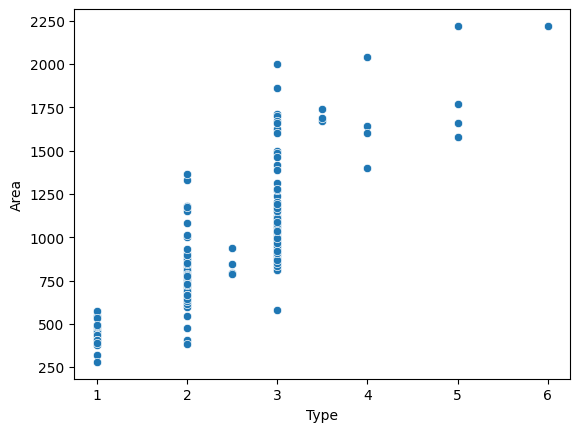

In [16]:
sns.scatterplot(df, y='Area', x='Type')

### Feature Engineering

<Axes: xlabel='count', ylabel='Sub-Area'>

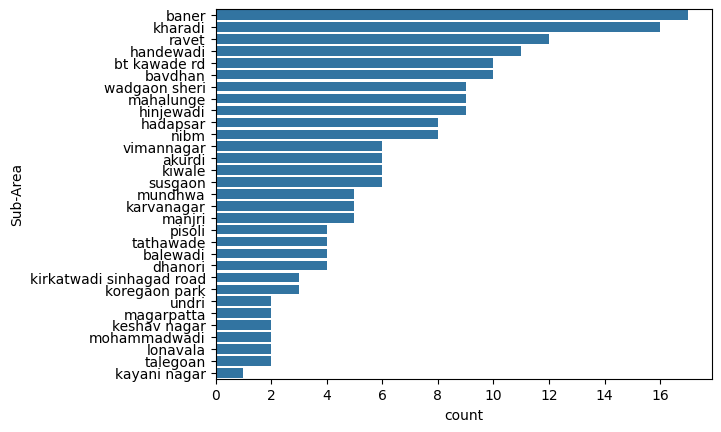

In [17]:
sub_area_count = pd.DataFrame(df['Sub-Area'].value_counts())
sns.barplot(y=sub_area_count.index, x=sub_area_count['count'], orient='h')

In [18]:
np.mean(sub_area_count)

np.float64(6.225806451612903)

It is observed that there is imbalance of categorical data. This might result in overfitting of the model. The mean of counts sits at 6.2. So we categorize all categories having less than 7 count as 'other'. 

In [19]:
sub_area_others = sub_area_count[sub_area_count["count"]<7].index.to_list()
df["Sub-Area"] = df["Sub-Area"].where(df["Sub-Area"].isin(sub_area_others), "other")

In [20]:
df

,Sub-Area,Type,Area,Price,Company,Township,ClubHouse,School,Hospital,Mall,Park,Pool,Gym
0,other,1.0,492,3.900,shapoorji paloonji,Vanaha,1,1,1,1,1,1,1
1,other,2.0,774,6.500,shapoorji paloonji,Vanaha,1,1,1,1,1,1,1
2,other,3.0,889,7.400,shapoorji paloonji,Vanaha,1,1,1,1,1,1,1
3,other,3.0,1018,8.900,shapoorji paloonji,Vanaha,1,1,1,1,1,1,1
4,other,2.0,743,7.400,godrej properties,Godrej Hills retreat,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,other,3.0,2000,16.000,supreme,SUPREME ESTIA,1,0,0,0,1,1,1
189,other,4.0,1600,23.000,supreme,SUPREME ESTIA,1,0,0,0,1,1,1
190,other,2.0,1173,9.500,tejraaj group,TEJ ELEVIA,0,0,0,0,1,1,1
191,other,3.0,1657,13.500,tejraaj group,TEJ ELEVIA,0,0,0,0,1,1,1


### Collinearity

### Categorical Features

In [21]:
def chi2(X, correction=True):
    col_pairs = list(combinations(X.columns, 2))
    results_list = []
    for col1, col2 in col_pairs:
        contingency = pd.crosstab(
            X[col1],
            X[col2]
        )
        chi2, p_val, dof, exp_freq = stats.chi2_contingency(
            contingency.values, correction=correction
        )
        results_list.append([col1, col2, chi2, p_val, dof])
    results = pd.DataFrame(
        results_list,
        columns=[
            'column1', 'column2', 'chi_squared', 'p_value', 'dof'
        ]
    )
    return results

In [22]:
X_chi2 = chi2(df.drop(columns=['Price', 'Area'], axis=1))
X_chi2

,column1,column2,chi_squared,p_value,dof
0,Sub-Area,Type,110.844954,9.671104e-01,140
1,Sub-Area,Company,2412.076775,1.657552e-186,700
2,Sub-Area,Township,3793.504202,1.404339e-308,1040
3,Sub-Area,ClubHouse,76.446784,1.560957e-08,20
4,Sub-Area,School,3.850807,9.999660e-01,20
5,Sub-Area,Hospital,3.850807,9.999660e-01,20
6,Sub-Area,Mall,3.850807,9.999660e-01,20
7,Sub-Area,Park,11.959525,9.174620e-01,20
8,Sub-Area,Pool,69.277161,2.389024e-07,20
9,Sub-Area,Gym,81.394215,2.273664e-09,20


In [23]:
X_chi2[X_chi2['p_value'] < 0.05]

,column1,column2,chi_squared,p_value,dof
1,Sub-Area,Company,2412.076775,1.657552e-186,700
2,Sub-Area,Township,3793.504202,1.404339e-308,1040
3,Sub-Area,ClubHouse,76.446784,1.560957e-08,20
8,Sub-Area,Pool,69.277161,2.389024e-07,20
9,Sub-Area,Gym,81.394215,2.273664e-09,20
19,Company,Township,6755.000000,0.000000e+00,1820
20,Company,ClubHouse,173.323529,3.126792e-20,35
21,Company,School,113.322995,3.421054e-10,35
22,Company,Hospital,113.322995,3.421054e-10,35
23,Company,Mall,113.322995,3.421054e-10,35


- 'Company Name' and 'Township' are highly correlated accoriding to lowest p-value in chi-squared test.
- Also 'Company Name' and 'Township' are correlated with 'Sub-Area', which means that 'Sub-Area' captures the trend of both 'Company Name' and 'Township'. So removing them.

In [24]:
df.drop(columns=['Company', 'Township'], axis=1, inplace=True)

### Encoding

In [25]:
df_encoded = pd.concat([
    df, 
    pd.get_dummies(df['Sub-Area'], dtype=int)
], axis=1)

df_encoded.drop(columns=['Sub-Area'], axis=1, inplace=True)
df_encoded

,Type,Area,Price,ClubHouse,School,Hospital,Mall,Park,Pool,Gym,...,manjri,mohammadwadi,mundhwa,other,pisoli,susgaon,talegoan,tathawade,undri,vimannagar
0,1.0,492,3.900,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,2.0,774,6.500,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,3.0,889,7.400,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,3.0,1018,8.900,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,2.0,743,7.400,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,3.0,2000,16.000,1,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
189,4.0,1600,23.000,1,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
190,2.0,1173,9.500,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
191,3.0,1657,13.500,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

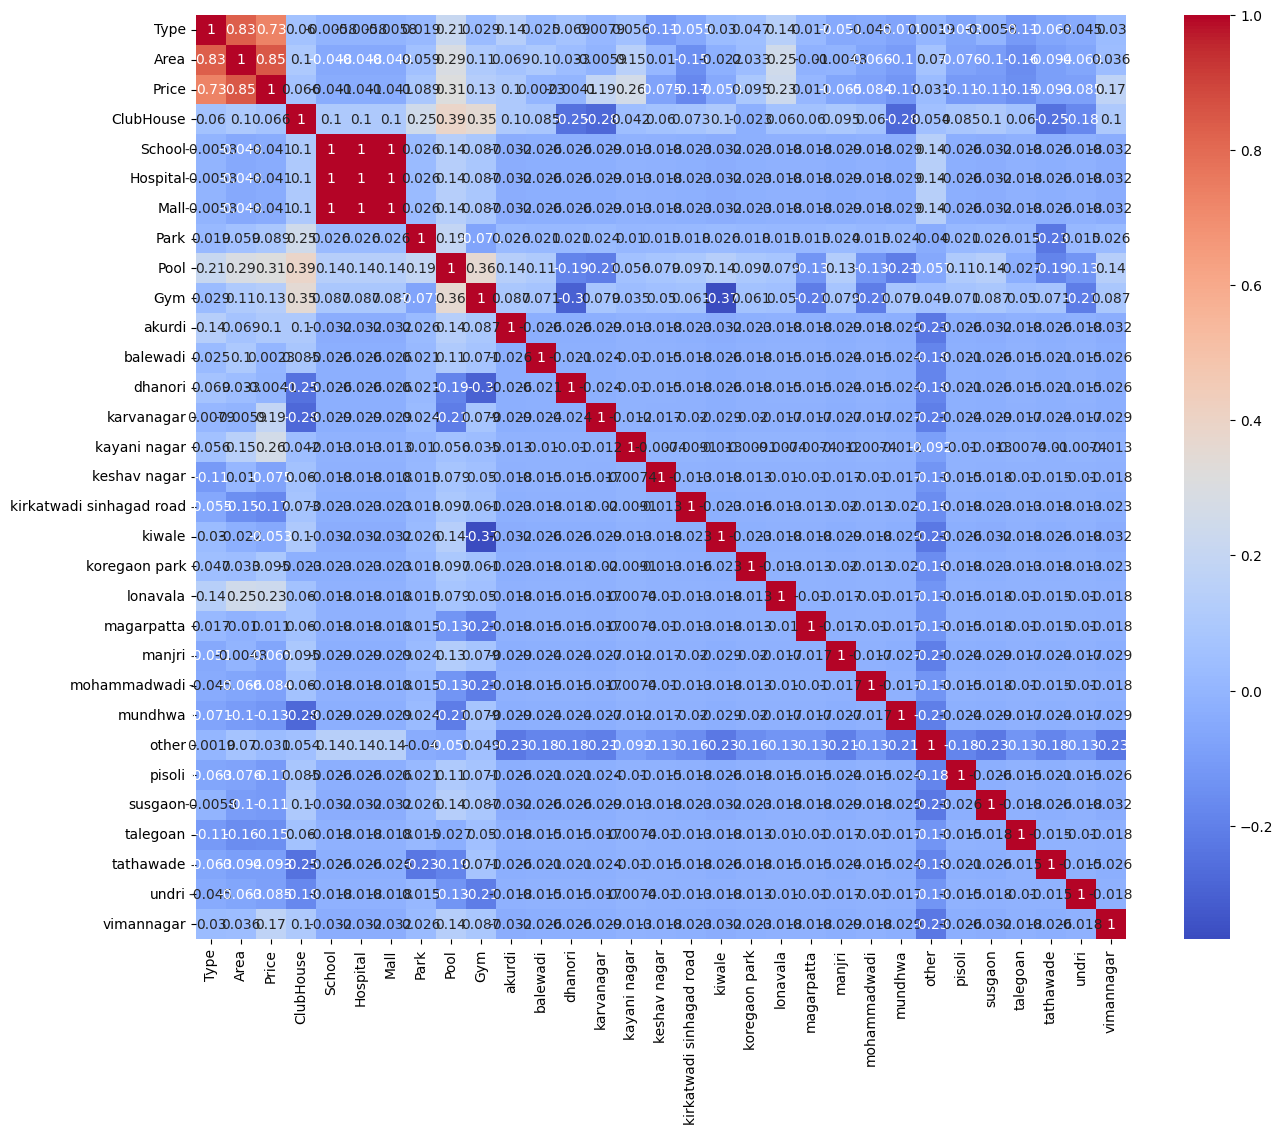

In [26]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")

- 'School', 'Hospital', 'Mall' are directly correlated with each other. Removing all of them
- 'Type' is also highly correlated with 'Area' which makes sense since generally higher area results in more rooms. The price of houses too generally depends highly on Area than room numbers.

In [27]:
df_encoded.drop(columns=['School', 'Hospital', 'Mall'], axis=1, inplace=True)
df_encoded.drop(columns=['Type'], axis=1, inplace=True)

### Missing Values

In [28]:
df_encoded.isnull().sum()

Area                        0
Price                       0
ClubHouse                   0
Park                        0
Pool                        0
Gym                         0
akurdi                      0
balewadi                    0
dhanori                     0
karvanagar                  0
kayani nagar                0
keshav nagar                0
kirkatwadi sinhagad road    0
kiwale                      0
koregaon park               0
lonavala                    0
magarpatta                  0
manjri                      0
mohammadwadi                0
mundhwa                     0
other                       0
pisoli                      0
susgaon                     0
talegoan                    0
tathawade                   0
undri                       0
vimannagar                  0
dtype: int64

### Scaling

In [29]:
df_encoded

,Area,Price,ClubHouse,Park,Pool,Gym,akurdi,balewadi,dhanori,karvanagar,...,manjri,mohammadwadi,mundhwa,other,pisoli,susgaon,talegoan,tathawade,undri,vimannagar
0,492,3.900,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,774,6.500,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,889,7.400,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1018,8.900,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,743,7.400,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2000,16.000,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
189,1600,23.000,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
190,1173,9.500,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
191,1657,13.500,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Scaling 'Area' column
scaler = StandardScaler()
df_encoded['Area'] = scaler.fit_transform(df_encoded[['Area']])

<Axes: xlabel='Price', ylabel='Count'>

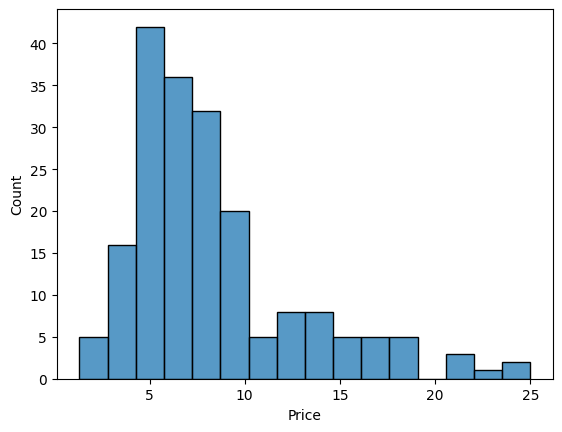

In [31]:
sns.histplot(df_encoded['Price'])

'Price' seems to be left-skewed. For Homoscedasticity we transform the column using Yeo-Johnson transformation.

In [32]:
pt = PowerTransformer(method='yeo-johnson')
df_encoded['Price'] = pt.fit_transform(df_encoded[['Price']])

### Save Dataframe

In [33]:
df_encoded.to_csv("./data/transformed_data.csv", index=False)